Shape of X: (18000, 9)
Shape of y: (18000,)
X - Mean: 0.49863228 Std: 0.5049867 Min: -0.55502254 Max: 1.4224007
y - Mean: 0.502 Std: 0.49999599998399974 Min: 0 Max: 1


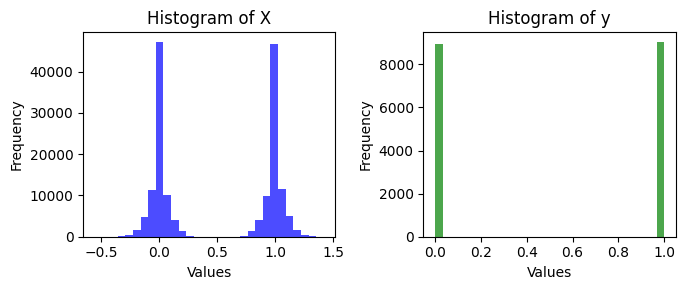

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Check dimensions
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Basic EDA: Display some stats
print("X - Mean:", np.mean(X), "Std:", np.std(X), "Min:", np.min(X), "Max:", np.max(X))
print("y - Mean:", np.mean(y), "Std:", np.std(y), "Min:", np.min(y), "Max:", np.max(y))

# Visualise histograms for X and y
plt.figure(figsize=(7, 3))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X.flatten(), bins=30, alpha=0.7, color='blue')
plt.title('Histogram of X')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Histogram for y
plt.subplot(1, 2, 2)
plt.hist(y, bins=30, alpha=0.7, color='green')
plt.title('Histogram of y')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Dimension 1 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 2 - Mean: 0.50, Std: 0.51, Min: -0.56, Max: 1.38
Dimension 3 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 4 - Mean: 0.49, Std: 0.50, Min: -0.50, Max: 1.42
Dimension 5 - Mean: 0.50, Std: 0.51, Min: -0.38, Max: 1.41
Dimension 6 - Mean: 0.50, Std: 0.51, Min: -0.35, Max: 1.36
Dimension 7 - Mean: 0.51, Std: 0.51, Min: -0.40, Max: 1.39
Dimension 8 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 9 - Mean: 0.49, Std: 0.51, Min: -0.37, Max: 1.42


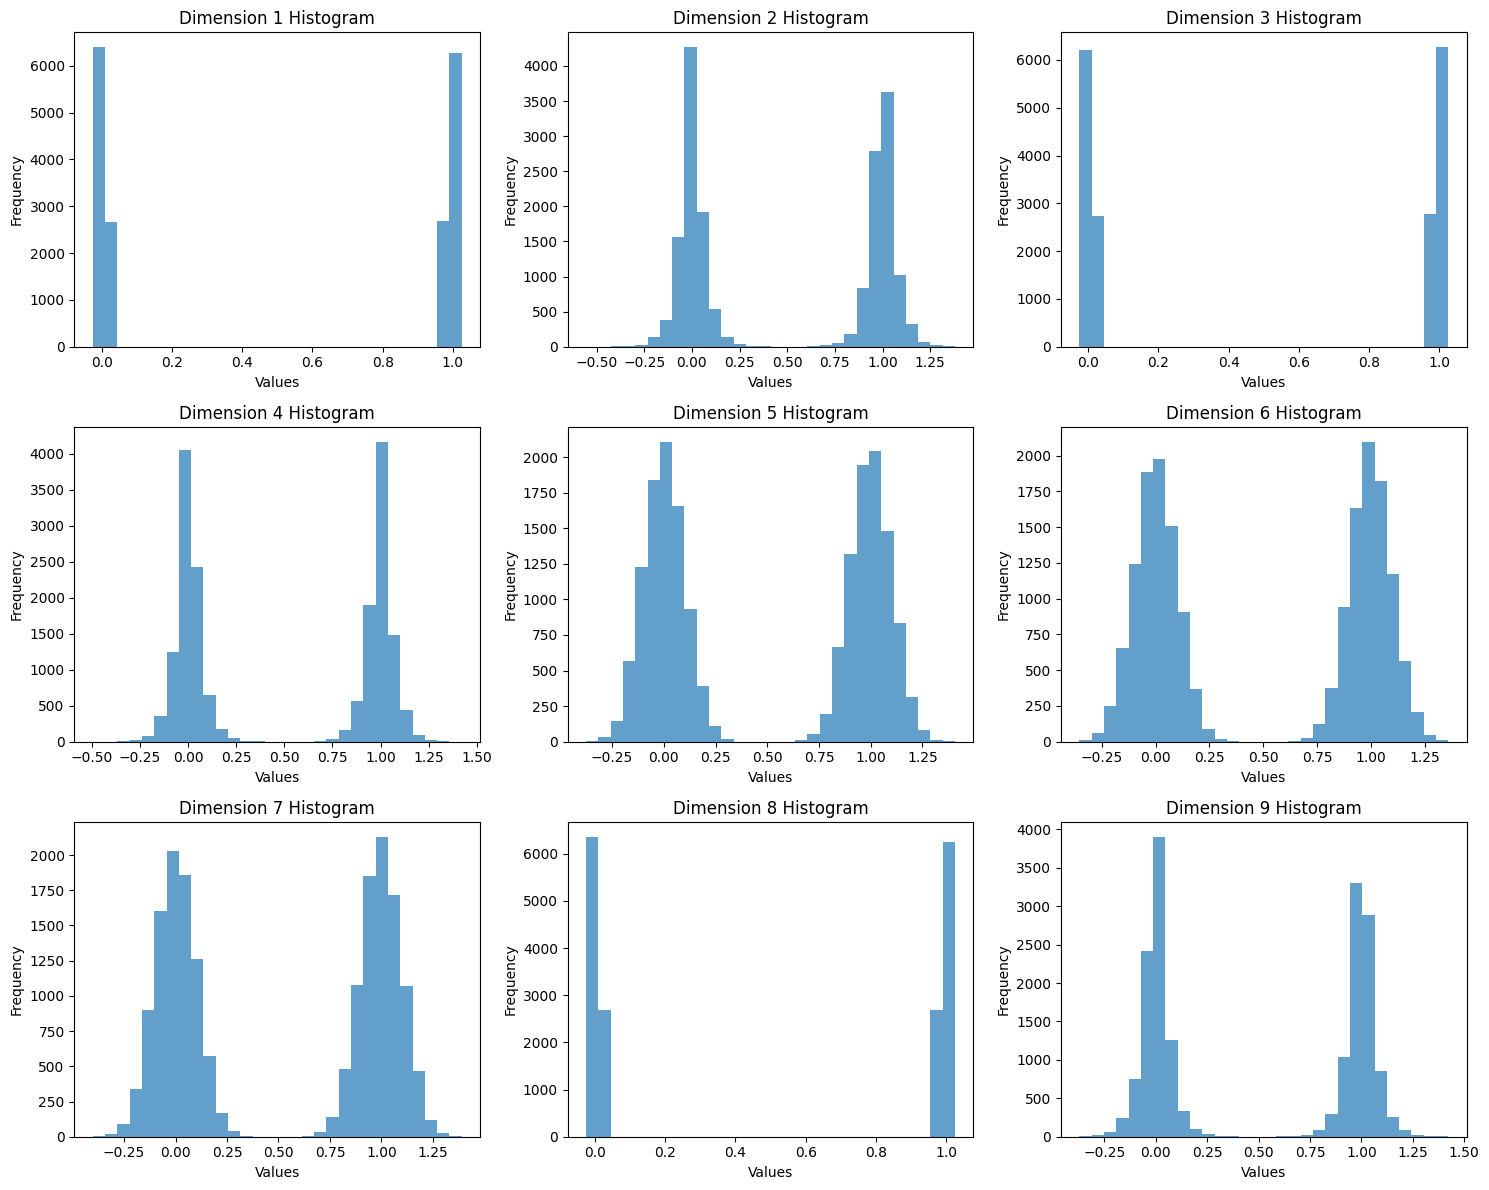

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate and display basic stats for each dimension
for i in range(X.shape[1]):
    print(f"Dimension {i+1} - Mean: {np.mean(X[:, i]):.2f}, Std: {np.std(X[:, i]):.2f}, Min: {np.min(X[:, i]):.2f}, Max: {np.max(X[:, i]):.2f}")

# Plot histograms for each dimension
plt.figure(figsize=(15, 12))
for i in range(X.shape[1]):
    plt.subplot(3, 3, i + 1)
    plt.hist(X[:, i], bins=30, alpha=0.7)
    plt.title(f'Dimension {i+1} Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Naive NN

Training set: (12600, 9) (12600,)
Validation set: (2700, 9) (2700,)
Test set: (2700, 9) (2700,)
Epoch 1/100


/Users/timothychung/opt/anaconda3/envs/ml2/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.5171 - loss: 0.6909 - val_accuracy: 0.5552 - val_loss: 0.6765
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.6864 - loss: 0.6305 - val_accuracy: 0.8904 - val_loss: 0.3953
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9244 - loss: 0.3239 - val_accuracy: 0.9500 - val_loss: 0.2247
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9517 - loss: 0.2116 - val_accuracy: 0.9496 - val_loss: 0.2170
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9544 - loss: 0.1962 - val_accuracy: 0.9515 - val_loss: 0.2065
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9523 - loss: 0.1952 - val_accuracy: 0.9522 - val_loss: 0.2091
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9566 - loss: 0.1826 - val_accuracy: 0.9459 - val_loss: 0.2258
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9551 - loss: 0.1864 - val_

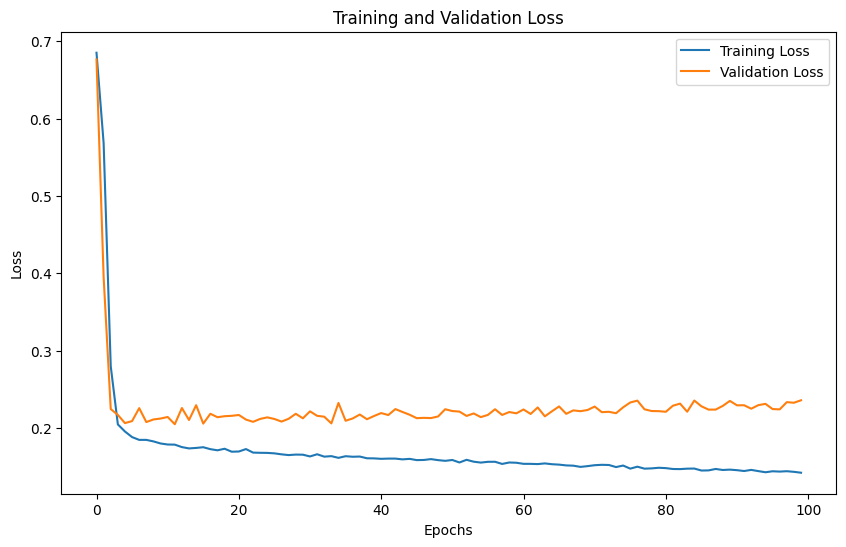

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9510 - loss: 0.2005
Test Loss: 0.1869, Test Accuracy: 0.9544


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
